<a href="https://colab.research.google.com/github/kop57890/acerml/blob/main/fgo_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tarfile
from urllib.request import urlretrieve
url = "https://github.com/Elwing-Chou/acerml/raw/main/fgo_icon.tar"
urlretrieve(url, "fgo.tar")
tar = tarfile.TarFile("fgo.tar")
tar.extractall()

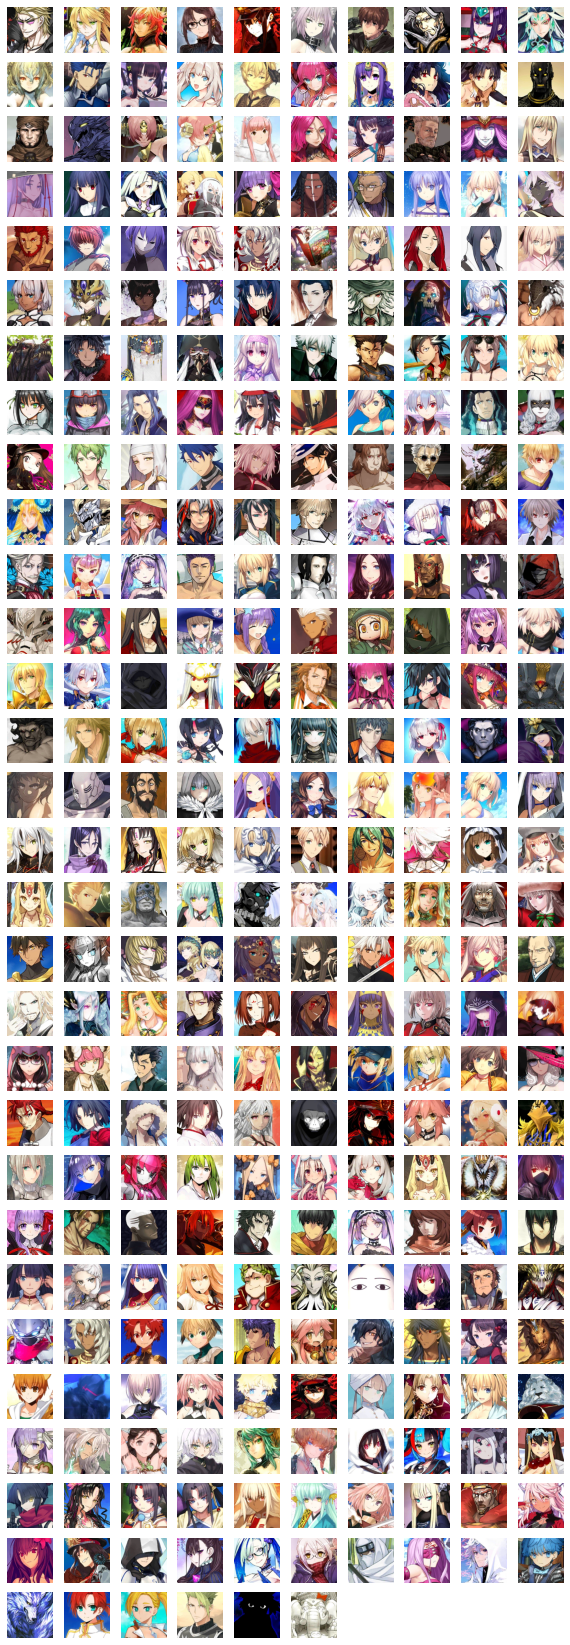

In [10]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
pics = []
for fn in glob.glob("fgo_icon/*.png"):
    img = np.array(Image.open(fn).convert("RGB"))
    pics.append(img)
pics = np.array(pics)

plt.figure(figsize=(10, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(pics):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

In [11]:
import pandas as pd
print("before reshape:", pics.shape)
pics_reshape = pics.reshape(pics.shape[0], -1)
print("after reshape:", pics_reshape.shape)
pd.DataFrame(pics_reshape)

before reshape: (296, 128, 128, 3)
after reshape: (296, 49152)


0      1      2      3      4      ...  49147  49148  49149  49150  49151
0       18     18     18     18     18  ...    104    104     92     92     92
1       69     18    103     69     18  ...    255    255    255    255    255
2      101     68     59    101     68  ...    223    181    247    223    181
3      140    181    214    142    175  ...     47     55     49     49     57
4      199     29      0    166     47  ...      8      8      0      0      0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
291      0     46    165      0     46  ...    255    255    255    255    255
292      0    202    202      0    202  ...    213    189    255    213    189
293    255    255    195    253    253  ...     68     68     68     68     68
294      2      2    104      2      2  ...      2     59      0      0     49
295    233    233    224    233    233  ...    198    182    178    169    153

[296 rows x 49152 columns]

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
pics_pca = pca.fit_transform(pics_reshape)
print("每個軸variance:", pca.explained_variance_ratio_)
print("加總:", sum(pca.explained_variance_ratio_))

每個軸variance: [0.23059968 0.06445426 0.05616374 0.03415942 0.02942252 0.02490515
 0.02040986 0.0178937  0.01650301 0.01295638 0.01255184 0.01057262
 0.01024366 0.00974537 0.00925121 0.00847311 0.00834371 0.00819407
 0.00763137 0.00712582]
加總: 0.5996005096601533


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

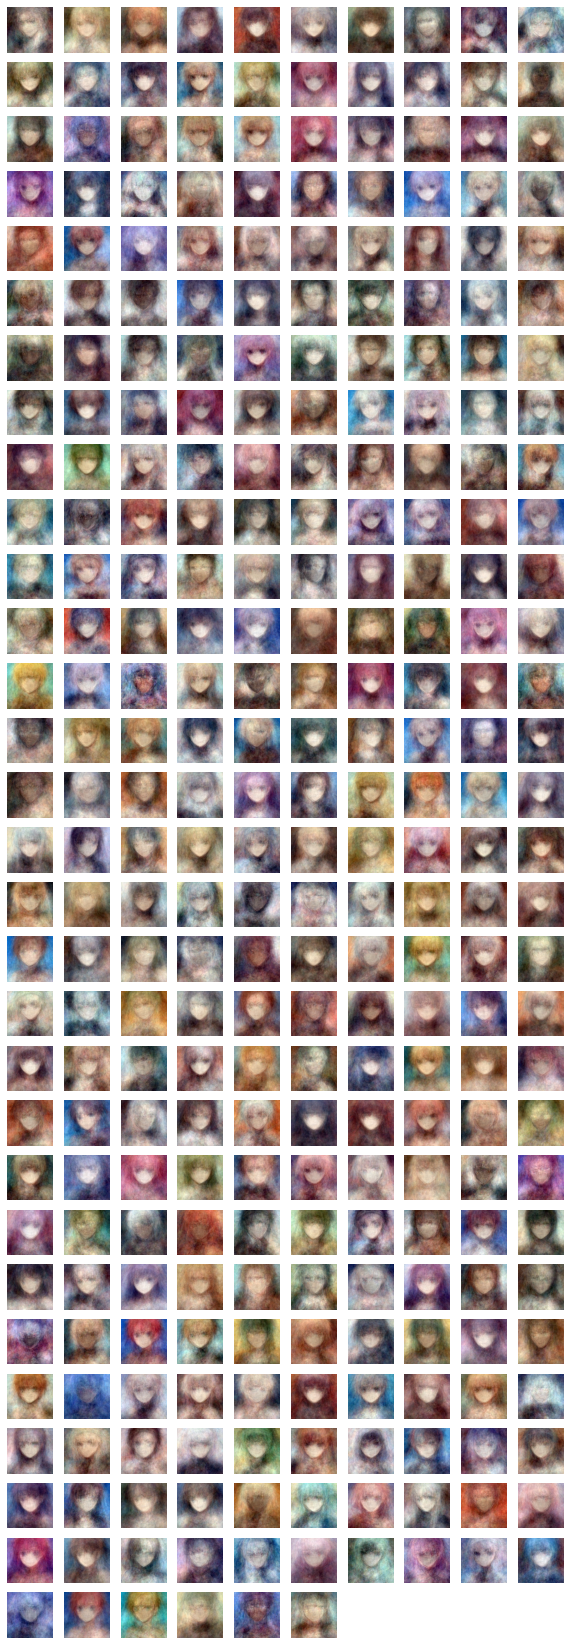

In [13]:
from sklearn.preprocessing import minmax_scale

pics_pca_inv = pca.inverse_transform(pics_pca)
pics_pca_inv = minmax_scale(pics_pca_inv, axis=1)
pics_pca_inv_re = pics_pca_inv.reshape(pics.shape)
plt.figure(figsize=(10, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(pics_pca_inv_re):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


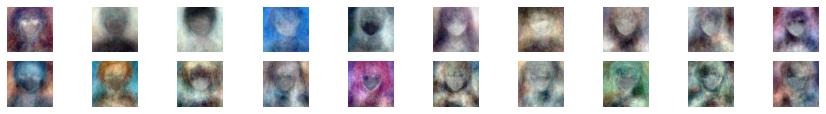

In [14]:
component_re = minmax_scale(pca.components_, axis=1)
component_re = component_re.reshape(pca.components_.shape[0], 128, 128, 3)
plt.figure(figsize=(15, 30))
width = 10
height = len(pics) // width + 1
for i, img in enumerate(component_re):
    plt.subplot(height, width, i+1)
    plt.axis("off")
    plt.imshow(img)

In [15]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
x_test_tsne = tsne.fit_transform(pics_pca)
scaler = MinMaxScaler()
x_test_tsne_scale = scaler.fit_transform(x_test_tsne)

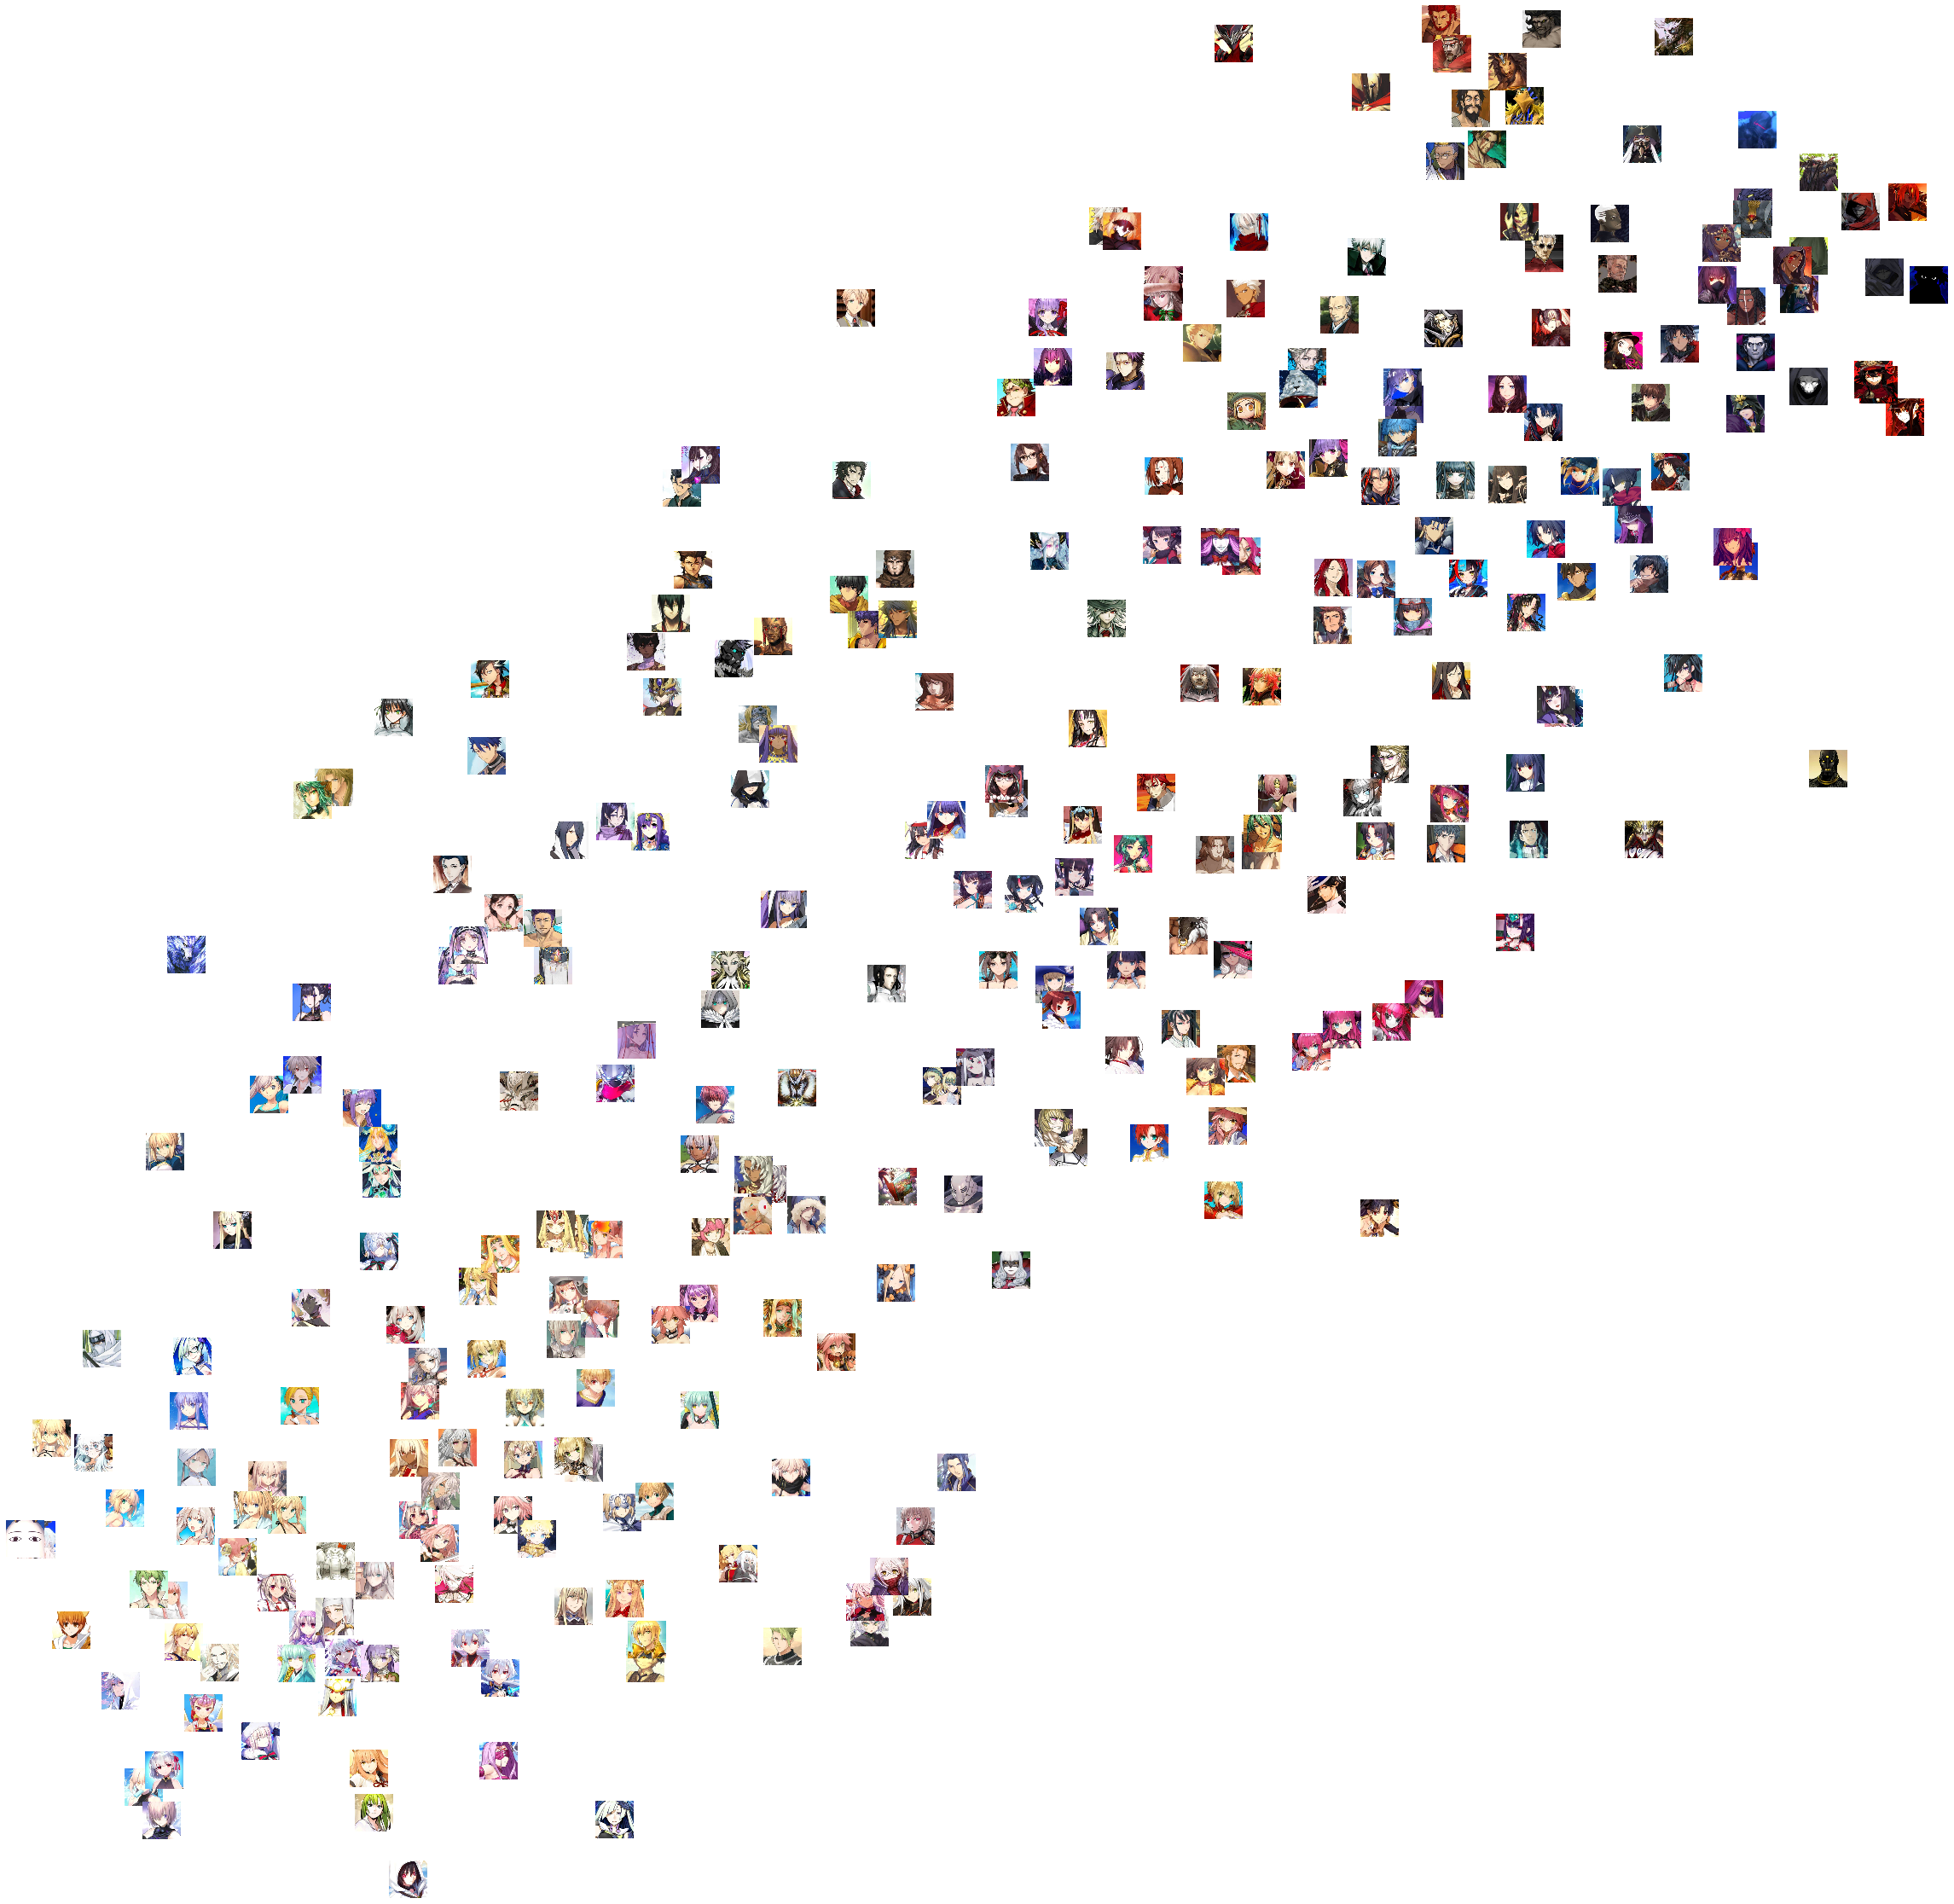

In [16]:
from matplotlib import pyplot as plt
from matplotlib.image import BboxImage
from matplotlib.transforms import Bbox, TransformedBbox

# Create figure
fig = plt.figure(figsize=(40, 40))
ax = plt.subplot(1, 1, 1)
plt.axis("off")
xs = x_test_tsne_scale[:, 0]
ys = x_test_tsne_scale[:, 1]

for x, y, p in zip(xs, ys, pics):
    bb = Bbox.from_bounds(x, y, 0.02,0.02)  
    bb2 = TransformedBbox(bb, ax.transData)
    bbox_image = BboxImage(bb2, norm= None, origin=None, clip_on=False)
    bbox_image.set_data(p)
    ax.add_artist(bbox_image)